# 유방암 종양 예측

## 악성 종양인지, 양성 종양(정상)인지 예측

## 데이터셋 불러오기

* radius : 반경
* texture : 질감
* perimeter : 둘레
* area : 면적
* smoothness : 매끄러움
* compactness : 조그만 정도
* concavity : 윤곽의 오목함
* concave points : 윤곽의 오목한 부분의 수
* symmetry : 대칭
* fractal dimension : 프랙탈 차원
* target : Malignant-악성 종양 / Benign-양성 종양(정상)
---
* mean ~ : 데이터별 평균 값
* ~ error : 데이터별 표준편차 값
* worst ~ : 데이터별 가장 큰 3개의 평균으로 만든 값

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrKAI/dataset/main/breast_cancer.csv')

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 데이터 전처리

<details><summary>Hint</summary>

* x, y 구분 필요
* y에 대한 전처리 필요
* 데이터셋 구분 필요

</details>

In [4]:
# 데이터 분리
target = 'target'
x = data.drop(target, axis=1)
y = data[target]

## 기본 모델 분석 (로컬 연결 레이어 사용 안 함)

In [5]:
# 필요 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [6]:
from keras.metrics import Precision, Recall

In [7]:
# 훈련용/시험용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [8]:
y_train.unique()

array(['Malignant', 'Benign'], dtype=object)

In [9]:
# y 값 숫자화
y_train = y_train.map({'Benign':0,'Malignant':1})
y_test = y_test.map({'Benign':0,'Malignant':1})

In [10]:
# 세션 클리어
clear_session()

# 레이어 생성 (히든 레이어 노드 12개)
il = Input(shape=(30,),name='Input')
hl = Dense(12,activation='relu')(il)
hl = Dense(12,activation='relu')(hl)
ol = Dense(1,activation='sigmoid')(hl)

# 모델 생성
model = Model(il,ol)

# 모델 컴파일
model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy',Precision(), Recall()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


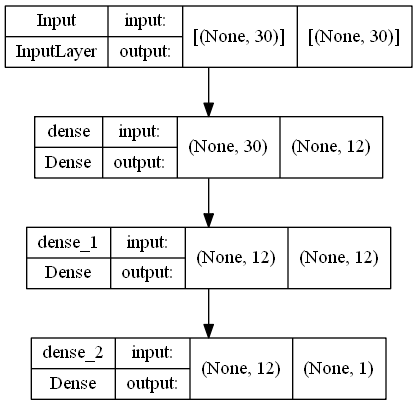

In [11]:
# 모델 요약
model.summary()
# 요약 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [12]:
# ES 설정
es = EarlyStopping(monitor='val_loss', min_delta=0,patience=10,verbose=1,restore_best_weights=True)

In [13]:
# 모델 학습
model.fit(x_train, y_train, verbose=1, validation_split=0.15, epochs=1000, callbacks=[es])

Epoch 1/1000
11/11 [==============================] - 1s 45ms/step - loss: 82.2089 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 73.2800 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 51.1239 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 39.7840 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 23.3678 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 8.9381 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.3029 - accuracy: 0.6095 - precision: 0.4880 - recall: 0.6328 - val_loss: 2.2397 - val_accuracy: 0.8667 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 2.4004 - accuracy: 0.804

11/11 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9112 - precision: 0.8889 - recall: 0.8750 - val_loss: 0.0381 - val_accuracy: 0.9833 - val_precision: 1.0000 - val_recall: 0.9375
Epoch 38/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.8846 - precision: 0.8618 - recall: 0.8281 - val_loss: 0.0632 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 39/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.9053 - precision: 0.9211 - recall: 0.8203 - val_loss: 0.0824 - val_accuracy: 0.9667 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 40/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.8994 - precision: 0.8615 - recall: 0.8750 - val_loss: 0.0492 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 41/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.9142 - precision: 

In [14]:
# 모델 예측
y_pred = model.predict(x_test)

In [19]:
y_pred = np.around(y_pred)
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [18]:
y_test

453    0
153    0
385    1
67     0
528    0
      ..
252    1
358    0
491    0
521    1
398    0
Name: target, Length: 171, dtype: int64

In [20]:
# 테스트 결과 평가
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       103
           1       0.98      0.82      0.90        68

    accuracy                           0.92       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



## Locally connected layer를 구성하기 위한 feature 설정

* mean, error, worst를 각 feature별로 묶어 새로운 변수를 만든다.
        ex) mean radius, radius error, worst radius

<details><summary> Hint </summary>

* x의 train 구조와 test 구조는 동일해야 한다.

</details>

In [ ]:
x_train.info()

In [23]:
# mean, error, worst 별로 구분
xt_mean = x_train.loc[:,['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
                        'mean concavity','mean concave points','mean symmetry','mean fractal dimension']]
xt_error = x_train.loc[:,['radius error','texture error','perimeter error','area error','smoothness error',
                         'compactness error','concavity error','concave points error','symmetry error','fractal dimension error']]
xt_worst = x_train.loc[:,['worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness',
                         'worst concavity','worst concave points','worst symmetry','worst fractal dimension']]

## 모델링

1. 윗 단계에서 생성한 변수의 **형태**를 이용하여, 각 변수별 input layer를 만든다.
2. node가 12개인 hidden layer를 **각각** 생성하여, 각 input layer와 연결한다.
3. 생성된 hidden layer를 add 한다.
---
4. 전체 변수를 이용한 input layer를 만든다.
5. 3번 단계로 add 된 레이어와 4번 단계로 만들어진 input layer를 concat한다.
---
6. node가 128개인 hidden layer를 5번 단계로 concat된 레이어와 연결한다.
7. output layer를 생성하고 compile 한다.

In [24]:
# 로컬 레이어 확인
print(xt_mean.shape)
print(xt_error.shape)
print(xt_worst.shape)

(398, 10)
(398, 10)
(398, 10)


In [25]:
# 세션 초기화
clear_session()

# 레이어 생성
il_1 = Input(shape=(10,),name='means')
hl_1 = Dense(12,activation='relu')(il_1)

il_2 = Input(shape=(10,),name='errors')
hl_2 = Dense(12, activation='relu')(il_2)

il_3 = Input(shape=(10,),name='radiuses')
hl_3 = Dense(12, activation='relu')(il_3)

cl = Concatenate()([hl_1,hl_2,hl_3])
ol = Dense(1,activation='sigmoid')(cl)

# 모델 생성
model = Model([il_1,il_2,il_3],ol)

# 모델 컴파일
model.compile(loss=binary_crossentropy,optimizer=Adam(),metrics=['accuracy',Precision(), Recall()])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 means (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 errors (InputLayer)            [(None, 10)]         0           []                               
                                                                                                  
 radiuses (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 12)           132         ['means[0][0]']                  
                                                                                              

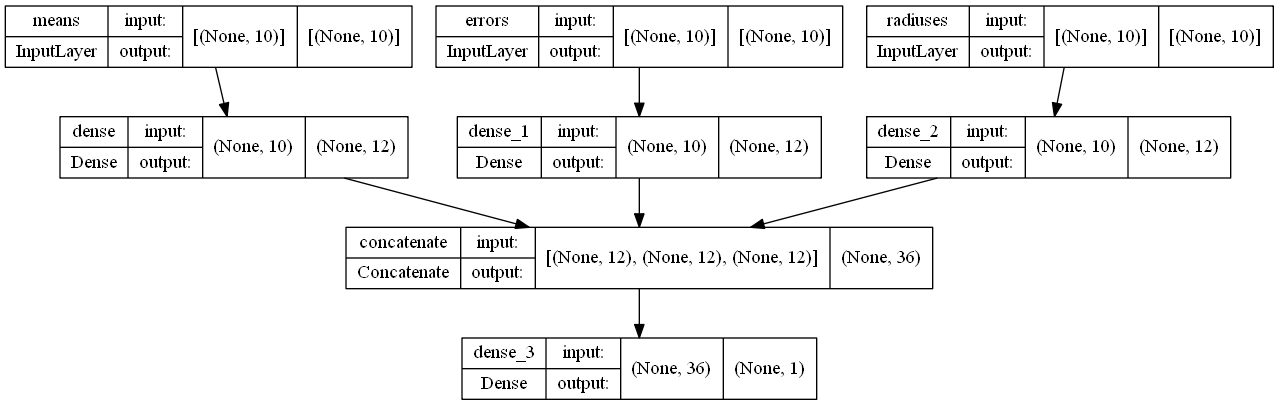

In [26]:
# 모델 요약
model.summary()

# 요약 시각화
plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
# EarlyStopping 추가
es = EarlyStopping(monitor='val_loss',verbose=1,restore_best_weights=True, min_delta=0,patience=10)

In [28]:
# 모델 학습
model.fit([xt_mean,xt_error,xt_worst],y_train, verbose=1, validation_split=0.15, epochs=1000,callbacks=[es])

Epoch 1/1000
11/11 [==============================] - 1s 46ms/step - loss: 113.9118 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 113.6129 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 89.5202 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 85.9640 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 65.8392 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 58.2722 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 41.8647 - accuracy: 0.3787 - precision: 0.3787 - recall: 1.0000 - val_loss: 30.8559 - val_accuracy: 0.2667 - val_precision: 0.2667 - val_recall: 1.0000
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 18.5461 - accuracy:

11/11 [==============================] - 0s 5ms/step - loss: 1.0464 - accuracy: 0.8787 - precision: 0.8175 - recall: 0.8750 - val_loss: 0.0533 - val_accuracy: 0.9667 - val_precision: 0.9375 - val_recall: 0.9375
Epoch 38/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.0284 - accuracy: 0.8817 - precision: 0.8235 - recall: 0.8750 - val_loss: 0.0398 - val_accuracy: 0.9667 - val_precision: 0.9375 - val_recall: 0.9375
Epoch 39/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.0204 - accuracy: 0.8846 - precision: 0.8397 - recall: 0.8594 - val_loss: 0.0841 - val_accuracy: 0.9833 - val_precision: 1.0000 - val_recall: 0.9375
Epoch 40/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.9887 - accuracy: 0.8846 - precision: 0.8346 - recall: 0.8672 - val_loss: 0.0343 - val_accuracy: 0.9833 - val_precision: 0.9412 - val_recall: 1.0000
Epoch 41/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.9331 - accuracy: 0.8817 - precision: 

In [29]:
# 평가용 데이터 구분
xT_mean = x_test.loc[:,['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
                        'mean concavity','mean concave points','mean symmetry','mean fractal dimension']]
xT_error = x_test.loc[:,['radius error','texture error','perimeter error','area error','smoothness error',
                         'compactness error','concavity error','concave points error','symmetry error','fractal dimension error']]
xT_worst = x_test.loc[:,['worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness',
                         'worst concavity','worst concave points','worst symmetry','worst fractal dimension']]
# 모델 예측
y_pred = model.predict([xT_mean,xT_error,xT_worst])

In [33]:
# 예측 결과 조회
y_pred = np.around(y_pred)
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [31]:
type(y_test)

pandas.core.series.Series

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       103
           1       0.94      0.85      0.89        68

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
# 모델 평가
model.evaluate([xT_mean,xT_error,xT_worst],y_test)

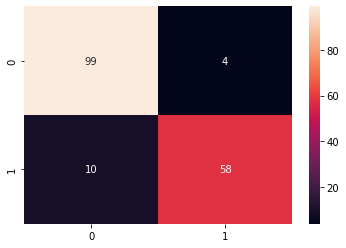

In [36]:
# 결과 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()

## 평가

1. 모델의 정확도를 확인하시오.
2. 악성이라 예측한 것 중 실제 악성으로 나온 비율을 구하시오.
3. 실제 악성 중 모델이 악성이라 예측한 것의 비율을 구하시오.
4. 정상이라 예측한 것 중 실제 정상으로 나온 비율을 구하시오.

* 부분적으로 연결된 레이어(Locally connected layer) 기반 모델을 학습했을 때 큰 차이가 없는 것 같다.

* 일반 모델 재실행한 결과 : accuracy: 0.92 - precision: 0.98 - recall: 0.82

* 로컬 모델 재실행한 결과 : accuracy: 0.92 - precision: 0.94 - recall: 0.85